## Compare Kalman filtering against traditional PTA methods


## Setup 


First lets quickly set up some bits

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
# Hacky way to add higher directory to python modules path. 
# Means that I dont have to make src/ a proper python package
try:
    sys.path.remove("../src") 
except:
    pass
sys.path.append("../src") 

## 1. Canonical example 

Lets create some scalar Brownian motion

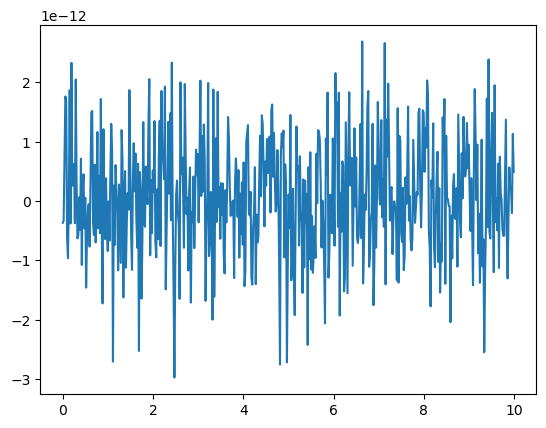

In [66]:

from system_parameters import BrownianMotionParameters
from synthetic_data import ScalarBrownianMotion
import matplotlib.pyplot as plt 

P = BrownianMotionParameters(σm=1e-12,σp=1e-18,seed=4)
data = ScalarBrownianMotion(P)  

#Plot it 
plt.plot(P.t_years, data.measurement)

We want to run a Kalman filter model on this data.

First define all the Kalman machinery:

In [67]:
from model import KalmanBrownianMotion
model = KalmanBrownianMotion(P.dt,N_states=1)

Now run a Kalman filter 

In [68]:

from kalman_filter import KalmanFilter

#Initialise the Kalman filter
KF = KalmanFilter(model,data)

optimal_parameters = {'γ':P.γ,
                      'σp':P.σp,
                      'σm':P.σm,
}

x_results,y_results,ll = KF.run(optimal_parameters)


...and plot the results on top of the data

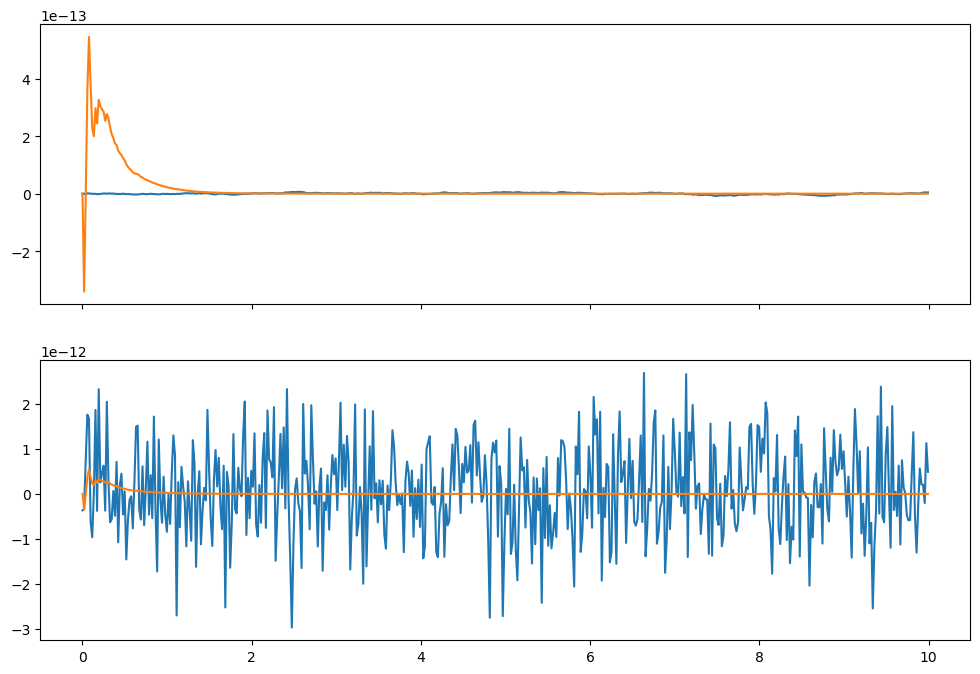

In [69]:

#Setup the figure
h,w = 12,8
rows = 2
cols = 1
fig, (ax1,ax2) = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=True)



ax1.plot(P.t_years, data.state)
ax2.plot(P.t_years, data.measurement)

ax1.plot(P.t_years,x_results)
ax2.plot(P.t_years,y_results)


# 2. As a pipeline 

In [83]:



from system_parameters import BrownianMotionParameters
from synthetic_data import ScalarBrownianMotion
import matplotlib.pyplot as plt 
from model import KalmanBrownianMotion


from kalman_filter import KalmanFilter



def pipeline(seed=1,σp=1e-20,σm=1e-11,γ=1e-13):

    P     = BrownianMotionParameters(σm=σm,σp=σm,γ=γ, seed=seed)
    data  = ScalarBrownianMotion(P)  
    model = KalmanBrownianMotion(P.dt,N_states=1)


    print(P)
    #Initialise the Kalman filter
    KF = KalmanFilter(model,data)

    optimal_parameters = {'γ':P.γ,
                        'σp':P.σp,
                        'σm':P.σm,
                         }

    x_results,y_results,ll = KF.run(optimal_parameters)



    #Plot
    #Setup the figure
    h,w = 12,8
    rows = 2
    cols = 1
    fig, (ax1,ax2) = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=True)



    ax1.plot(P.t_years, data.state)
    ax2.plot(P.t_years, data.measurement)

    ax1.plot(P.t_years,x_results)
    ax2.plot(P.t_years,y_results)

    

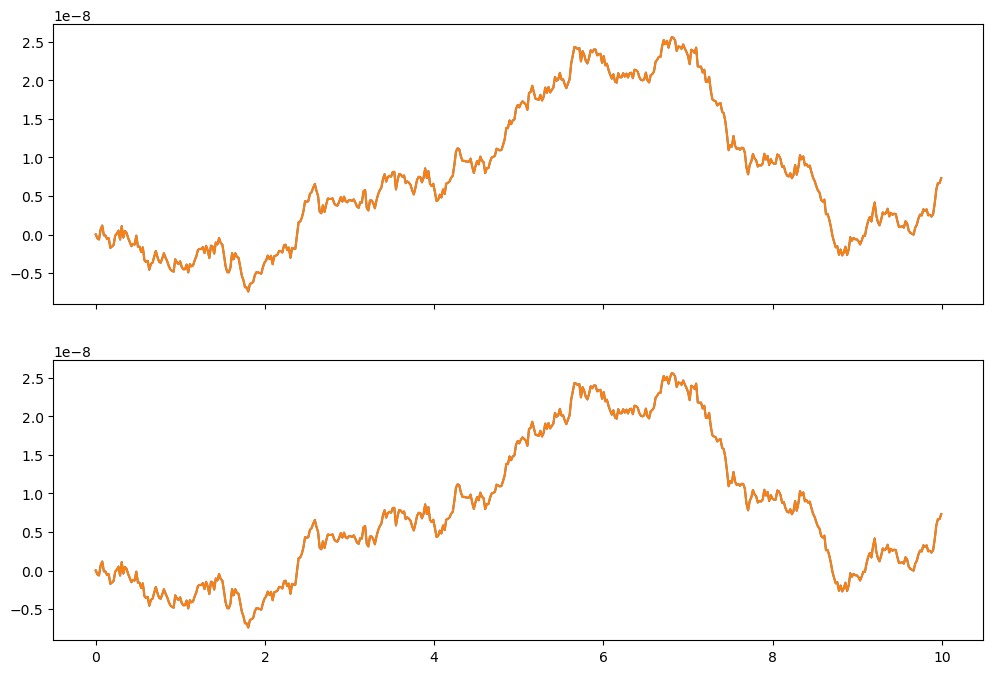

In [84]:
pipeline(σm=1e-12,σp=1e-18,seed=4)